# Questions about MLE or Logistic Regression
* How is Logistic Regression different from Linear Regression?
    * 
* 

# What do we remember from yesterday?
* Logistic Regression used with categorical targets
    * data - king's county dataset
         * predict that a house is on the waterfront
         * P(waterfront=1.0|lat, long, grade, condition, sqft_living, etc)
         * what is our target?
             * waterfront
* You can turn into a continuous variable into a binary 
    * example:
        * sqft_living > 4000
        * sqft_living <= 4000

# Where/How is MLE used in Data Science?
* used in econometrics
* when dummy data is needed
    * certain projects can benefit from dummy data
* if population is normal but mean and variance are unknown
* estimate parameters of populations
    * when would we do this?
        * correlating heart measurements to running speeds
            * 2 dimensional problem
            * P(hr=V | past data)
            * P(hr=140bpm | 140bpm ~ mu after everyone ran a 40yd dash)
        * height of a population (normal) for females over the age of 12 in Houston, Tx
            * we measure the height of 2000 'random' females over the age of 12
            * P(mu=V | 2000 sample heights) -> mu_final = maximum P(mu=V|2000 sample heights)
            * P(std=V | 2000 sample heights) -> mu_final = sample standard deviation equation
            
        * What is the MLE of theta, where theta is flipping heads given you flipped 3 heads and 27 tails?
            * theta = 0.1 -> P(H|3H27T) = 0.1
            
# MLE is finding parameters to statistical distributions (typically) to describe what has been observed.

In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # can really drive a cost/benefit analysis

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = load_iris()
data = iris.data
target = iris.target
columns = iris.feature_names
target_names = iris.target_names

In [6]:
df = pd.DataFrame(data, columns=columns)
df['target'] = target
df['target_names'] = [target_names[i] for i in target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Figure size 576x360 with 0 Axes>

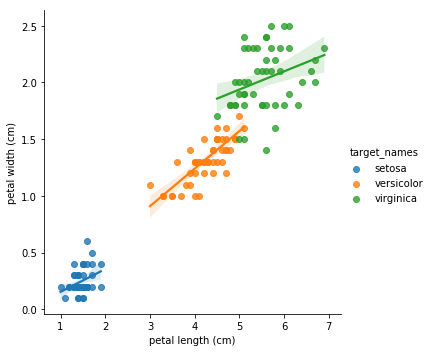

In [18]:
plt.figure(figsize=(8, 5))
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='target_names')
plt.show()

<Figure size 1440x1440 with 0 Axes>

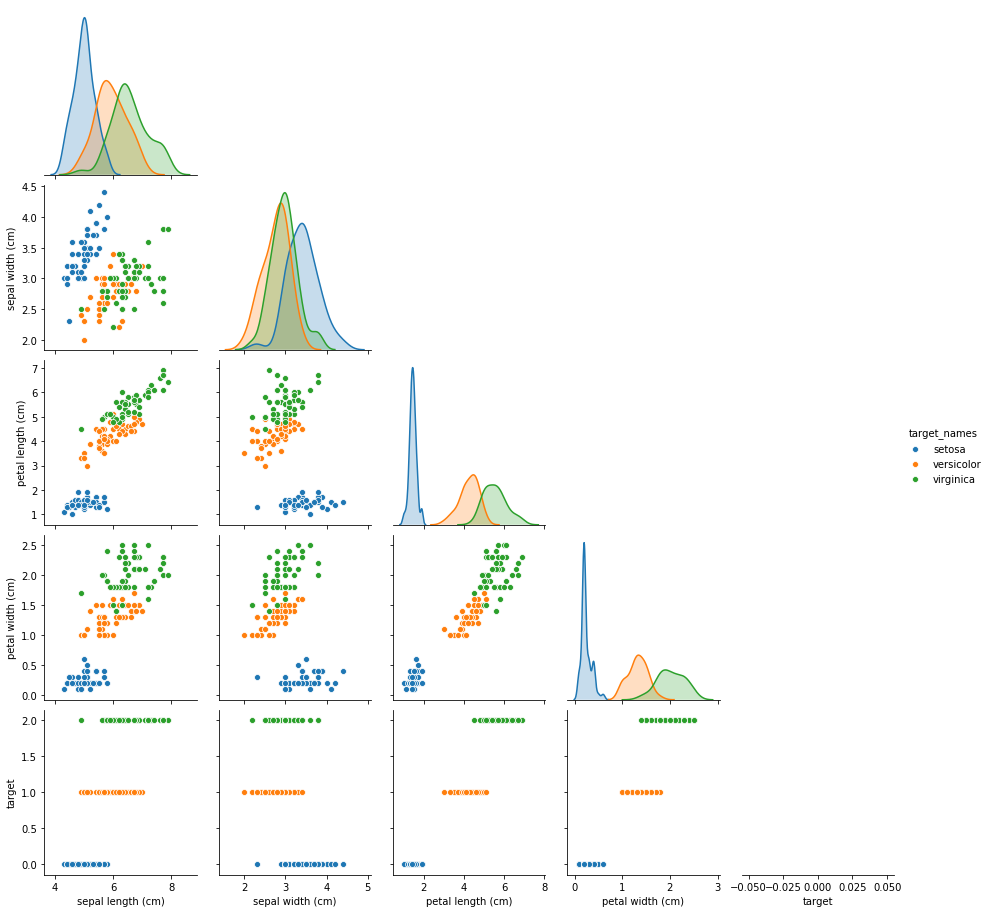

In [20]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=df, hue='target_names', corner=True)
plt.show()

In [21]:
logreg = LogisticRegression() # l2 = ridge regression

# What is penalty, tol, C, etc....?
# HyperParameters

In [22]:
df['is_setosa'] = df['target_names']=='setosa'
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,is_setosa
0,5.1,3.5,1.4,0.2,0,setosa,True
1,4.9,3.0,1.4,0.2,0,setosa,True
2,4.7,3.2,1.3,0.2,0,setosa,True
3,4.6,3.1,1.5,0.2,0,setosa,True
4,5.0,3.6,1.4,0.2,0,setosa,True


In [43]:
def sigmoid(x, b0, b1):
    return 1/(1 + np.exp(-(b0 + b1*x)))

In [54]:
petal_width_sigmoid = sigmoid(x=df['petal width (cm)'], b0=10.0, b1=-10)

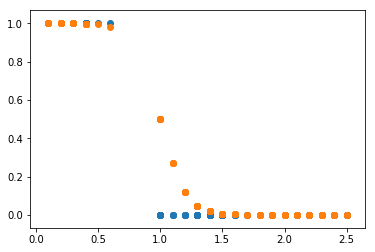

In [55]:
plt.scatter(df['petal width (cm)'], df['is_setosa'])
plt.scatter(df['petal width (cm)'], petal_width_sigmoid)
plt.show()

# Gradient Descent

1. define a starting point for our beta coefficients
2. pick a step size
3. define max iterations
4. pick a loss function
5. take the derivative of the loss function with respect to beta coefficients
6. logloss makes the derivative of our loss (mse) function where our yhat is a sigmoid function easier to calculate
7. logloss turns our multiplicative operations into additive operations 

# Logistic Regression w/ Gradient Descent
* We take the Log of our Loss Function because it contains a sigmoid function because this contains a fraction

# Parametric Model vs Non Parametric Model
* parametric model
    * linear regression, polynomial regression, logistic regression
    * can be expressed as an equation
    * yhat = function of parameters combined with your data
    
* Non Parametric Models
    * no parameters
    * cannot be expressed as an equation

# What did we learn today?
* why we take the derivative of the loss function
    * the derivative tells us which direction to step towards to try new beta coefficients
* logistic regression is just linear regression slammed into the exponent of a sigmoid function
* why log loss is favored
    * log loss is favored because it makes fractions more manageable in regards to the derivative
* difference between
    * parameters
        * beta parameters
    * hyperparameters
        * parameters that effect how the model changes
        * penalty from ridge to lasso
        * for the sake of saving a headache, everything you see when you instantiate a sklearn model
        * typically put them in at the beginning before you train a model
* 